In [3]:
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
dateparse=lambda dates:parse(dates)

from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

In [4]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# Read dataset

In [5]:
bapok_df = pd.read_csv('harga_bapokting_surabaya.csv', parse_dates=['Tanggal'],date_parser=dateparse)

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_8768\4241548464.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bapok_df = pd.read_csv('harga_bapokting_surabaya.csv', parse_dates=['Tanggal'],date_parser=dateparse)


# Pre Processing

In [6]:
#checking for null values
bapok_df.isna().sum()

Tanggal                        0
Beras Premium                  0
Beras Medium                   0
Beras SPHP                     0
Jagung Tk Peternak             0
Kedelai Biji Kering (Impor)    0
Bawang Merah                   0
Bawang Putih Bonggol           0
Cabai Merah Keriting           0
Cabai Merah Besar              0
Daging Sapi Murni              0
Cabai Rawit Merah              0
Daging Ayam Ras                0
Telur Ayam Ras                 0
Gula Konsumsi                  0
Minyak Goreng Kemasan          0
Minyak Goreng Curah            0
Tepung Terigu (Curah)          0
Minyakita                      0
Tepung Terigu Kemasan          0
Ikan Kembung                   0
Ikan Tongkol                   0
Ikan Bandeng                   0
Garam Konsumsi                 0
Daging Kerbau Beku (Impor)     0
Daging Kerbau Segar (Lokal)    0
dtype: int64

In [7]:
(bapok_df == 0).sum()

Tanggal                           0
Beras Premium                   222
Beras Medium                    222
Beras SPHP                     1284
Jagung Tk Peternak             1187
Kedelai Biji Kering (Impor)     567
Bawang Merah                    222
Bawang Putih Bonggol            222
Cabai Merah Keriting            222
Cabai Merah Besar              1409
Daging Sapi Murni               222
Cabai Rawit Merah               222
Daging Ayam Ras                 222
Telur Ayam Ras                  222
Gula Konsumsi                   222
Minyak Goreng Kemasan           223
Minyak Goreng Curah             541
Tepung Terigu (Curah)           222
Minyakita                      1409
Tepung Terigu Kemasan           789
Ikan Kembung                    755
Ikan Tongkol                    733
Ikan Bandeng                    710
Garam Konsumsi                  788
Daging Kerbau Beku (Impor)     1521
Daging Kerbau Segar (Lokal)    1521
dtype: int64

In [8]:
(bapok_df == 0).mean() * 100  # dalam persen

Tanggal                          0.000000
Beras Premium                   14.595661
Beras Medium                    14.595661
Beras SPHP                      84.418146
Jagung Tk Peternak              78.040763
Kedelai Biji Kering (Impor)     37.278107
Bawang Merah                    14.595661
Bawang Putih Bonggol            14.595661
Cabai Merah Keriting            14.595661
Cabai Merah Besar               92.636423
Daging Sapi Murni               14.595661
Cabai Rawit Merah               14.595661
Daging Ayam Ras                 14.595661
Telur Ayam Ras                  14.595661
Gula Konsumsi                   14.595661
Minyak Goreng Kemasan           14.661407
Minyak Goreng Curah             35.568705
Tepung Terigu (Curah)           14.595661
Minyakita                       92.636423
Tepung Terigu Kemasan           51.873767
Ikan Kembung                    49.638396
Ikan Tongkol                    48.191979
Ikan Bandeng                    46.679816
Garam Konsumsi                  51

In [9]:
# Hitung jumlah nilai 0 per kolom
zero_counts = (bapok_df == 0).sum()

# Hitung persentase nilai 0 per kolom
zero_percent = (bapok_df == 0).mean() * 100
# Drop kolom dengan lebih dari 15% nilai 0
threshold = 15
columns_to_drop = zero_percent[zero_percent > threshold].index
bapok_df = bapok_df.drop(columns=columns_to_drop)

# Cek ulang sisa kolom setelah drop
remaining_columns = bapok_df.columns

zero_counts_cleaned = (bapok_df == 0).sum()
zero_percent_cleaned = (bapok_df == 0).mean() * 100

remaining_columns, zero_counts_cleaned, zero_percent_cleaned

(Index(['Tanggal', 'Beras Premium', 'Beras Medium', 'Bawang Merah',
        'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Daging Sapi Murni',
        'Cabai Rawit Merah', 'Daging Ayam Ras', 'Telur Ayam Ras',
        'Gula Konsumsi', 'Minyak Goreng Kemasan', 'Tepung Terigu (Curah)'],
       dtype='object'),
 Tanggal                    0
 Beras Premium            222
 Beras Medium             222
 Bawang Merah             222
 Bawang Putih Bonggol     222
 Cabai Merah Keriting     222
 Daging Sapi Murni        222
 Cabai Rawit Merah        222
 Daging Ayam Ras          222
 Telur Ayam Ras           222
 Gula Konsumsi            222
 Minyak Goreng Kemasan    223
 Tepung Terigu (Curah)    222
 dtype: int64,
 Tanggal                   0.000000
 Beras Premium            14.595661
 Beras Medium             14.595661
 Bawang Merah             14.595661
 Bawang Putih Bonggol     14.595661
 Cabai Merah Keriting     14.595661
 Daging Sapi Murni        14.595661
 Cabai Rawit Merah        14.595

In [10]:
bapok_df = bapok_df.drop(columns=["Tepung Terigu (Curah)"])

In [11]:
bapok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Tanggal                1521 non-null   datetime64[ns]
 1   Beras Premium          1521 non-null   int64         
 2   Beras Medium           1521 non-null   int64         
 3   Bawang Merah           1521 non-null   int64         
 4   Bawang Putih Bonggol   1521 non-null   int64         
 5   Cabai Merah Keriting   1521 non-null   int64         
 6   Daging Sapi Murni      1521 non-null   int64         
 7   Cabai Rawit Merah      1521 non-null   int64         
 8   Daging Ayam Ras        1521 non-null   int64         
 9   Telur Ayam Ras         1521 non-null   int64         
 10  Gula Konsumsi          1521 non-null   int64         
 11  Minyak Goreng Kemasan  1521 non-null   int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 142.7 KB


In [12]:
#converting the dataype of 'Date' col to 'datetime'
bapok_df['Tanggal'] = pd.to_datetime(bapok_df['Tanggal'], dayfirst=True)

In [13]:
bapok_df = bapok_df.set_index('Tanggal')

In [14]:
# Fungsi untuk mengganti nol dengan rata-rata per bulan (fallback ke bulan berikut jika perlu)
def fill_zero_with_monthly_mean(df):
    df_filled = df.copy()
    
    for col in df.columns:
        for idx, value in df[col].items():
            if value == 0:
                bulan_ini = idx.to_period('M')
                nilai_bulan_ini = df_filled[col][df_filled.index.to_period('M') == bulan_ini]
                mean_bulan_ini = nilai_bulan_ini[nilai_bulan_ini != 0].mean()
                
                if pd.isna(mean_bulan_ini):  # jika bulan itu semua 0, cari bulan setelahnya
                    bulan_berikutnya = bulan_ini + 1
                    while True:
                        nilai_bulan_berikut = df_filled[col][df_filled.index.to_period('M') == bulan_berikutnya]
                        mean_bulan_berikut = nilai_bulan_berikut[nilai_bulan_berikut != 0].mean()
                        if not pd.isna(mean_bulan_berikut):
                            mean_bulan_ini = mean_bulan_berikut
                            break
                        bulan_berikutnya += 1
                
                # Bulatkan rata-rata menjadi bilangan bulat
                df_filled.at[idx, col] = int(mean_bulan_ini)  # Menggunakan int() untuk menghilangkan koma

    return df_filled

# Terapkan fungsi ini
bapok_df = fill_zero_with_monthly_mean(bapok_df)

# Cek apakah masih ada nilai 0
(bapok_df == 0).sum()


Beras Premium            0
Beras Medium             0
Bawang Merah             0
Bawang Putih Bonggol     0
Cabai Merah Keriting     0
Daging Sapi Murni        0
Cabai Rawit Merah        0
Daging Ayam Ras          0
Telur Ayam Ras           0
Gula Konsumsi            0
Minyak Goreng Kemasan    0
dtype: int64

In [15]:
bapok_df

,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,Minyak Goreng Kemasan
Tanggal,,,,,,,,,,,
2021-01-03,12650,10537,27500,24250,27875,108750,33250,31875,20750,12000,15437
2021-02-03,12714,10500,27714,24285,26142,107857,32285,30714,20857,11857,15642
2021-03-03,12575,10500,32041,25916,45041,106041,79875,30833,21541,12000,14187
2021-04-03,12596,10500,30320,24600,32160,106400,43560,34320,22900,12000,14240
2021-05-03,12552,10482,30000,24695,31000,106739,38565,33782,22239,12043,14413
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25,15375,13000,39222,42667,41111,120000,51333,32625,25125,17375,20750
2025-04-26,15375,13000,38333,42667,39444,118889,46667,32625,25125,17500,20750
2025-04-27,15375,13000,39000,42667,39667,120000,46667,32625,25500,17500,20750


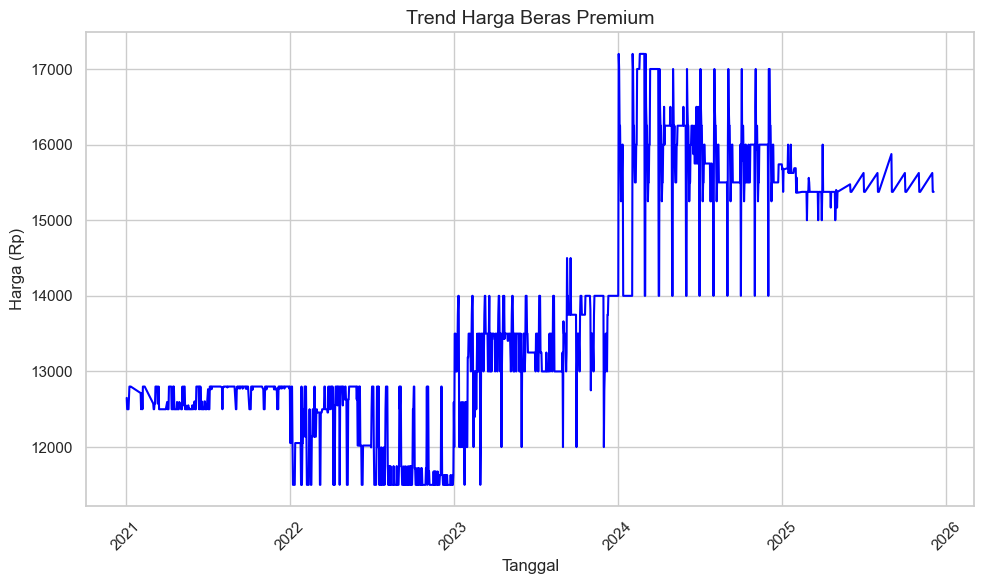

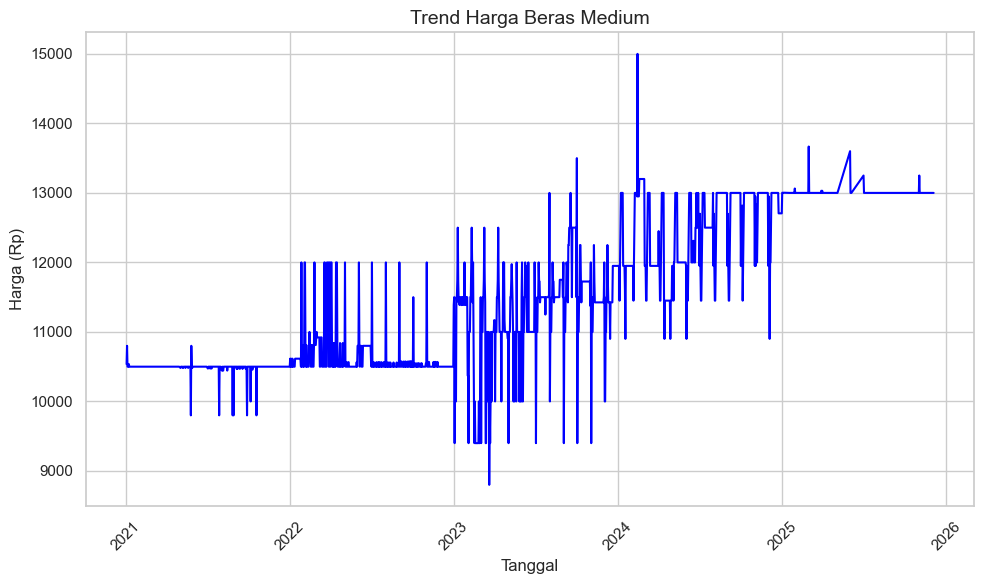

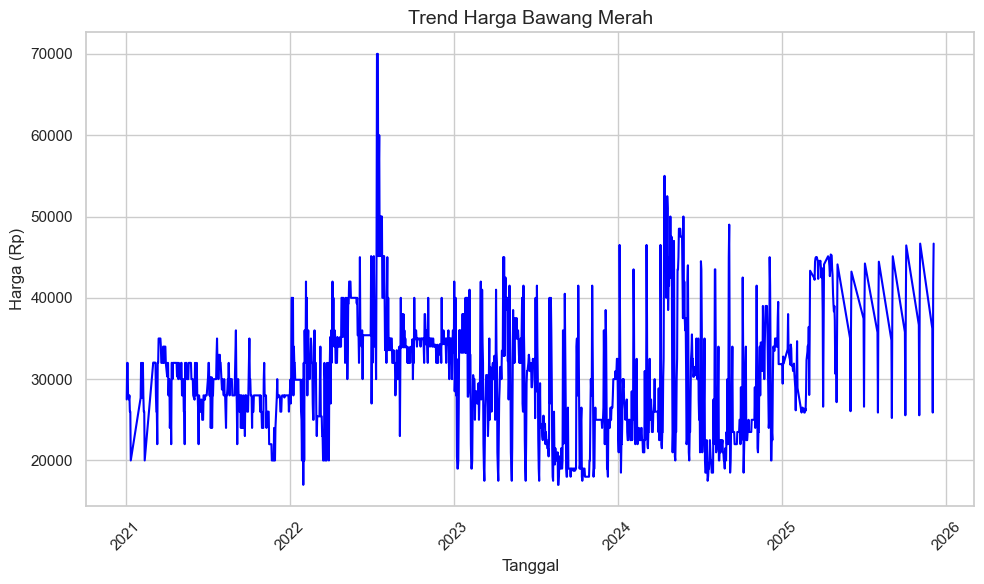

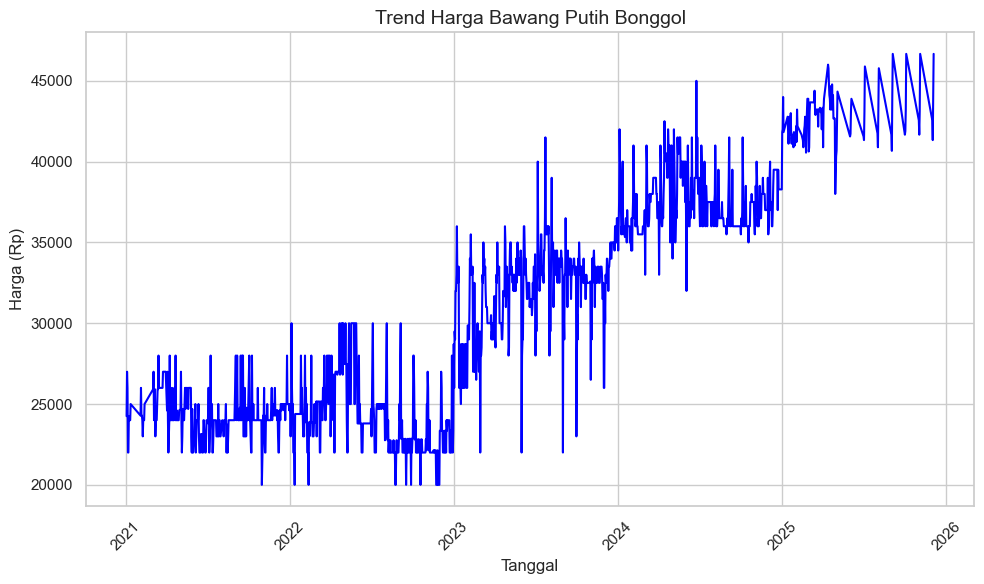

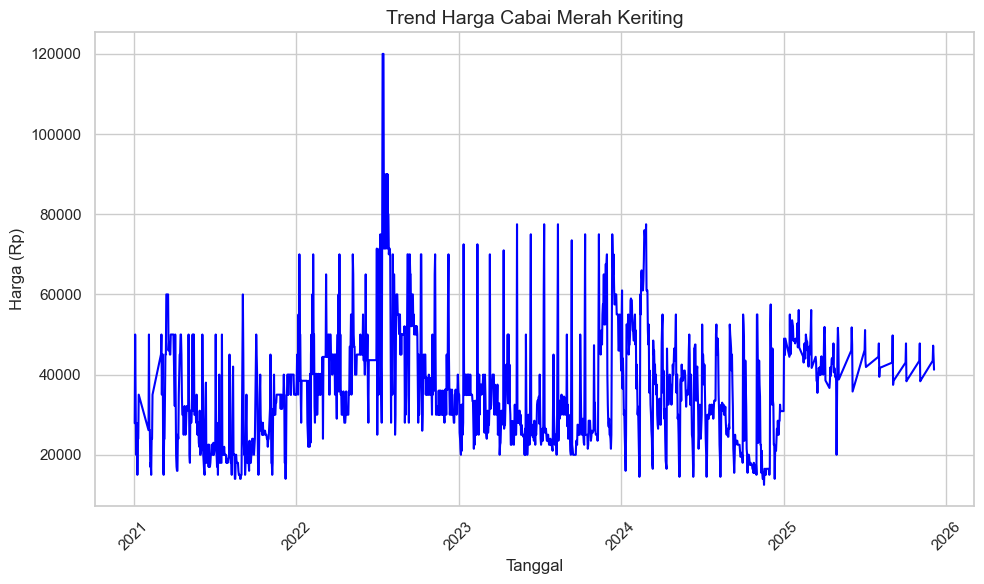

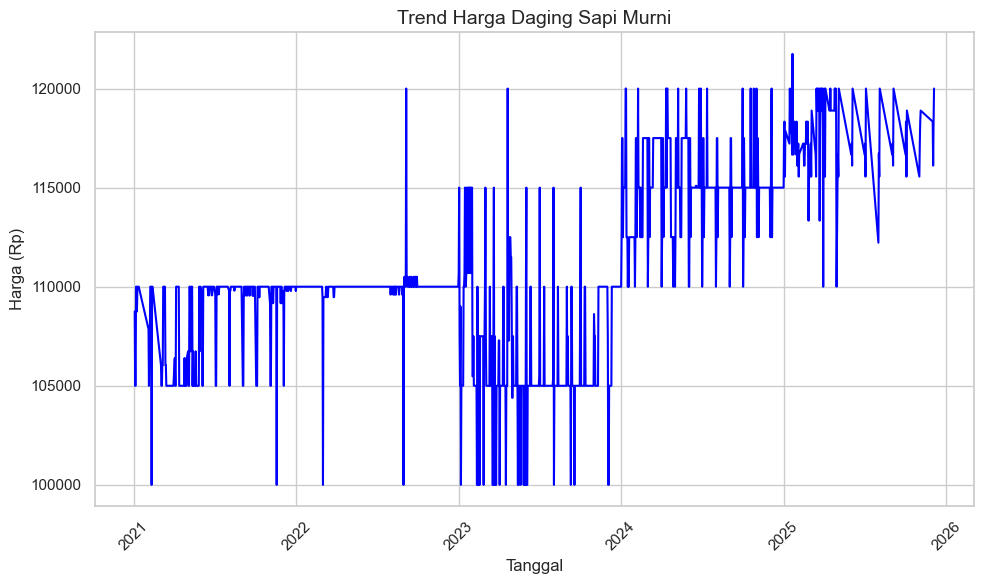

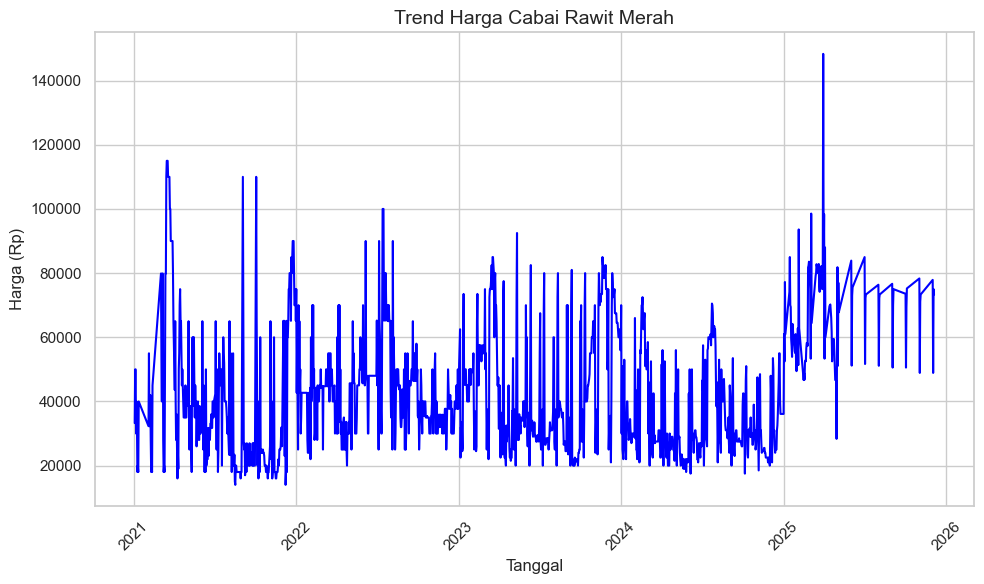

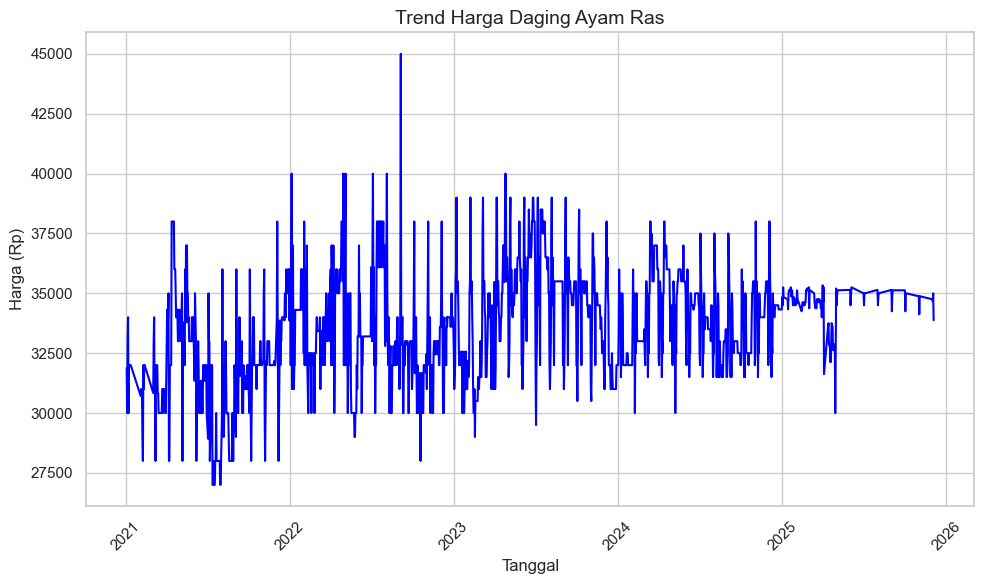

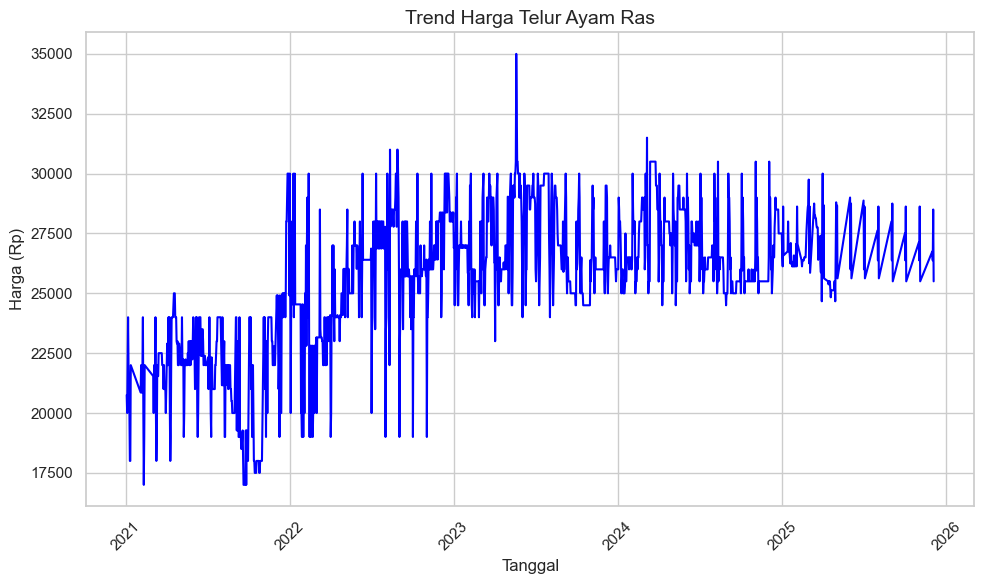

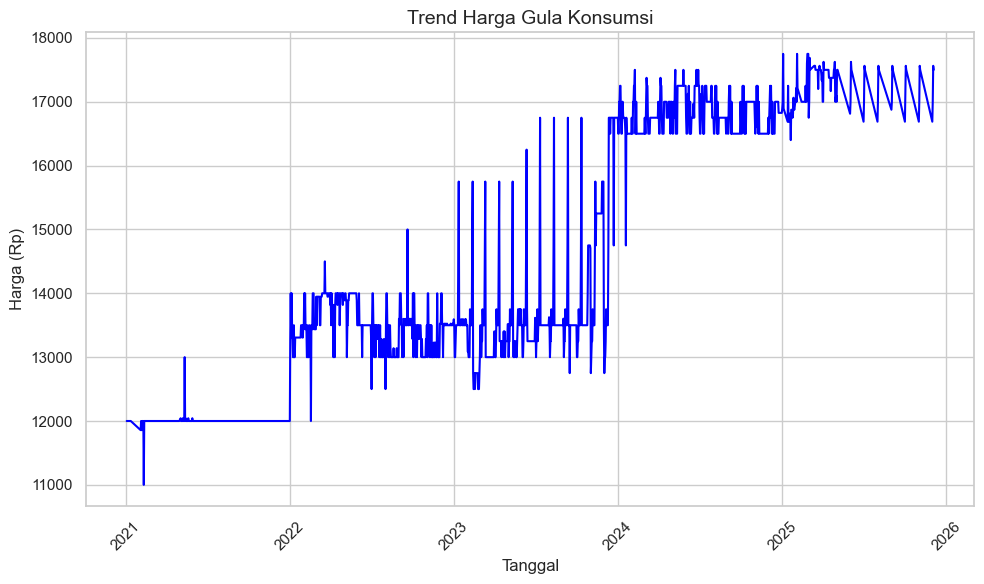

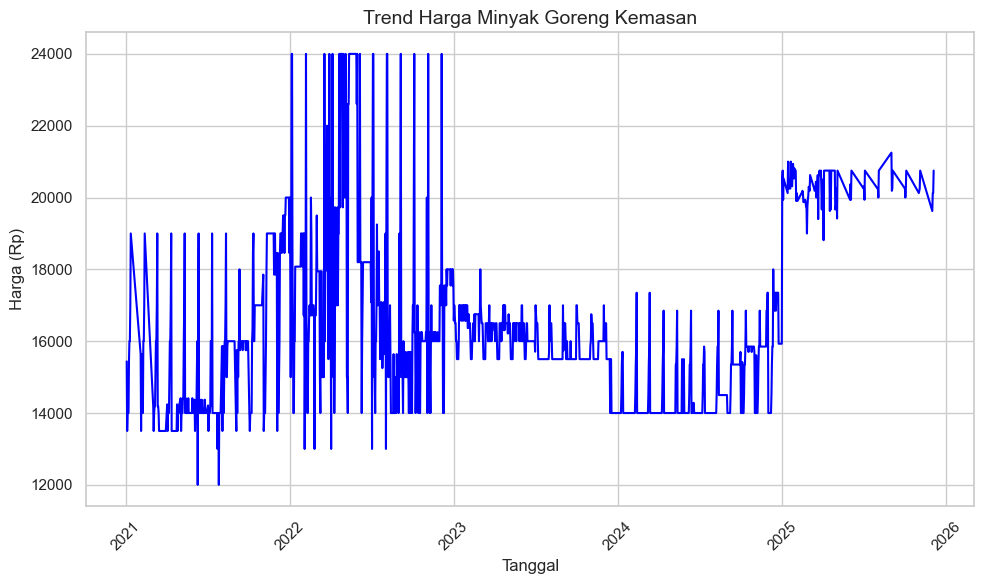

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom tanggal sebagai datetime dan index
bapok_df.index = pd.to_datetime(bapok_df.index)
bapok_df = bapok_df.sort_index()  # urutkan berdasarkan tanggal

# Set style seaborn
sns.set(style="whitegrid", palette="muted")

# Buat plot terpisah untuk setiap komoditas
for column in bapok_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(bapok_df.index, bapok_df[column], label=column, color='blue')
    plt.title(f'Trend Harga {column}', fontsize=14)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Harga (Rp)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# Train test split

**Sklearn TimeSeriesSplit:**

**Time Series cross-validator**

Provides train/test indices to split time series data samples that are observed at fixed time intervals, in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.

This cross-validation object is a variation of KFold. In the kth split, it returns first k folds as train set and the (k+1)th fold as test set.

Note that unlike standard cross-validation methods, successive training sets are supersets of those that come before them.

Observations: 761
Training Observations: 381
Testing Observations: 380


ValueError: Input could not be cast to an at-least-1D NumPy array

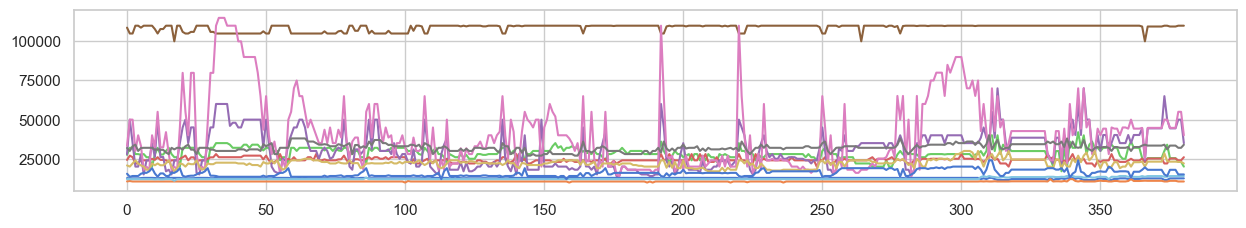

In [19]:
X = bapok_df.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1,figsize = (15,8))
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

# LSTM Forecast

LSTM stands for long short term memory. 
    
It is a model or architecture that extends the memory of recurrent neural networks.
Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. 
Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node. 

LSTM introduces long-term memory into recurrent neural networks. 
It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. 
It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers

In [ ]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model


In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]


Filtering few rows for quicker results.

In [ ]:
bapok_df_reduced = bapok_df[-1000:]

In [ ]:
# transform data to be stationary
raw_values = bapok_df_reduced['Monthly Mean Total Sunspot Number'].values
diff_values = difference(raw_values, 1)

In [ ]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [ ]:
# split data into train and test-sets
train, test = supervised_values[0:-200], supervised_values[-200:]

In [ ]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

array([[-0.08942208],
       [ 0.04894108],
       [-0.02336082],
       [-0.09384613],
       [-0.21761203],
       [-0.02626841],
       [-0.11661382],
       [-0.2725647 ],
       [-0.0563198 ],
       [-0.4441835 ],
       [-0.04006704],
       [ 0.04334825],
       [-0.0101888 ],
       [-0.13682196],
       [-0.0032048 ],
       [ 0.01341902],
       [-0.00835349],
       [ 0.00357749],
       [-0.2336975 ],
       [-0.25684917],
       [-0.10410981],
       [-0.08721627],
       [-0.1367643 ],
       [-0.16956246],
       [-0.03672922],
       [ 0.00804809],
       [ 0.04331153],
       [-0.01901416],
       [-0.08924247],
       [-0.2343095 ],
       [-0.07552309],
       [-0.06309646],
       [-0.23819193],
       [-0.10542082],
       [-0.33574677],
       [-0.04339873],
       [-0.0115383 ],
       [-0.04991687],
       [-0.11403769],
       [-0.01946855],
       [-0.04261203],
       [-0.07476062],
       [-0.03404029],
       [-0.04855368],
       [-0.22888678],
       [-0

In [ ]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Month=1, Predicted=70.454867, Expected=66.500000
Month=2, Predicted=66.682049, Expected=83.800000
Month=3, Predicted=76.300439, Expected=69.700000
Month=4, Predicted=69.690789, Expected=48.800000
Month=5, Predicted=55.436782, Expected=74.200000
Month=6, Predicted=69.258152, Expected=70.100000
Month=7, Predicted=67.962433, Expected=28.900000
Month=8, Predicted=40.174436, Expected=48.100000
Month=9, Predicted=49.946594, Expected=43.500000
Month=10, Predicted=46.153207, Expected=39.600000
Month=11, Predicted=42.363478, Expected=38.700000
Month=12, Predicted=40.430493, Expected=61.900000
Month=13, Predicted=53.339000, Expected=56.800000
Month=14, Predicted=52.569514, Expected=62.400000
Month=15, Predicted=56.646717, Expected=60.500000
Month=16, Predicted=56.890897, Expected=37.200000
Month=17, Predicted=42.817684, Expected=13.200000
Month=18, Predicted=23.924123, Expected=27.500000
Month=19, Predicted=30.435742, Expected=59.300000
Month=20, Predicted=48.394821, Expected=20.900000
Month=21,

Test RMSE: 14.557


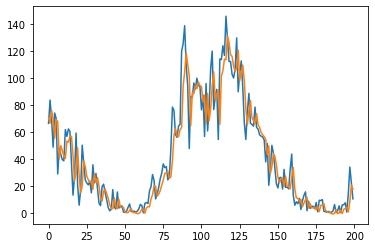

In [ ]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-200:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-200:])
pyplot.plot(predictions)
pyplot.show()

# Cross validation in Timeseries

Observations: 1001
Training Observations: 502
Testing Observations: 499
Test RMSE: 85.743


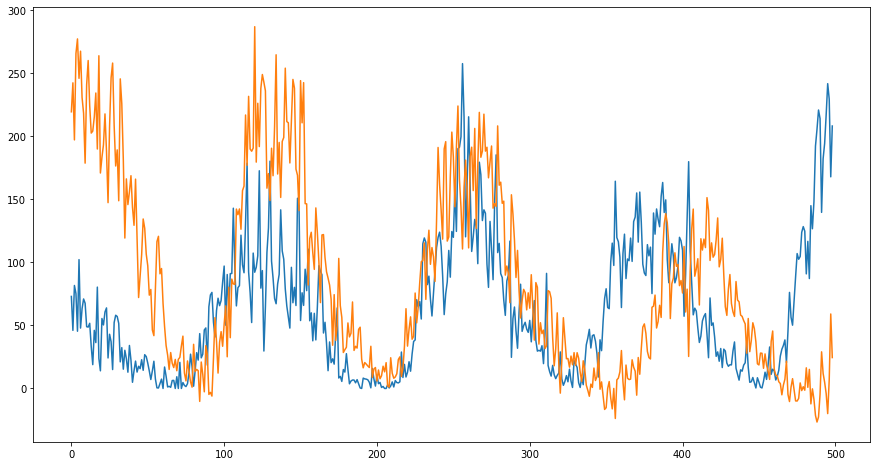

Observations: 1500
Training Observations: 1001
Testing Observations: 499
Test RMSE: 77.854


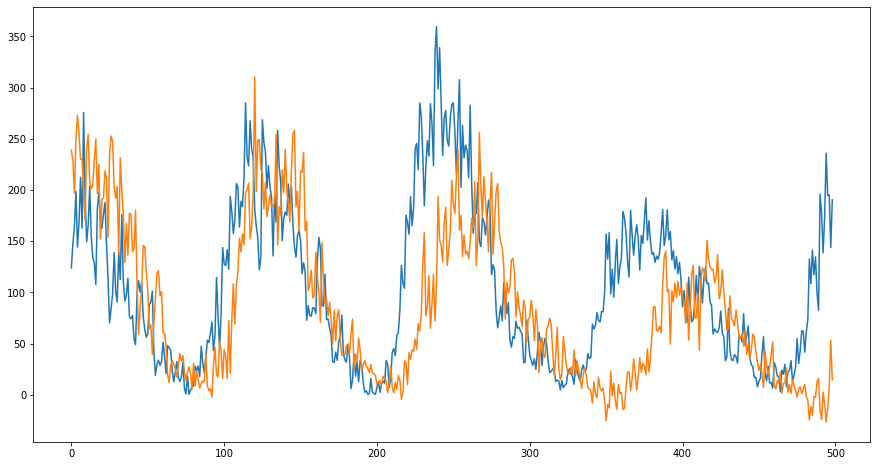

Observations: 1999
Training Observations: 1500
Testing Observations: 499
Test RMSE: 9.285


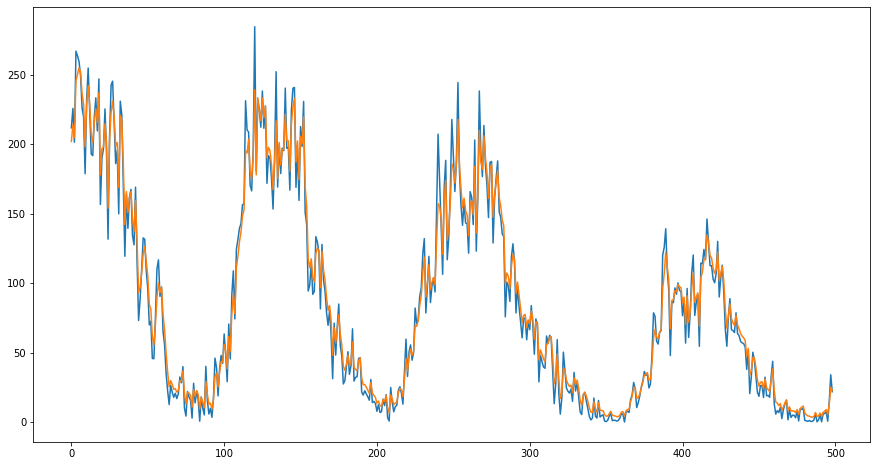

In [ ]:
rmse_list = []

bapok_df_reduced = bapok_df[-2000:]

raw_values = bapok_df_reduced['Monthly Mean Total Sunspot Number'].values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values


splits = TimeSeriesSplit(n_splits=3)
index = 1
for train_index, test_index in splits.split(supervised_values):
    train = supervised_values[train_index]
    test = supervised_values[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    index += 1
    
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    
    # fit the model
    lstm_model = fit_lstm(train_scaled, 1, 100, 4)
    # forecast the entire training dataset to build up state for forecasting
    train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
    lstm_model.predict(train_reshaped, batch_size=1)
    
    # walk-forward validation on the test data
    predictions = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
        expected = raw_values[len(train) + i + 1]
        #print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

    # report performance
    rmse = sqrt(mean_squared_error(raw_values[test_index] , predictions))
    rmse_list.append(rmse)
    print('Test RMSE: %.3f' % rmse)
    # line plot of observed vs predicted
    pyplot.figure(1,figsize = (15,8))
    pyplot.plot(raw_values[test_index])
    pyplot.plot(predictions)
    pyplot.show()


In [ ]:
rmse_list

[85.74321253210046, 77.85350023969474, 9.285070277707117]